In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import pylab
pylab.rcParams['figure.figsize'] = (15, 10)
import matplotlib.pyplot as plt

In [ ]:
itog = np.loadtxt('/content/drive/MyDrive/Small.csv', delimiter=",")

In [ ]:
out = itog[:,288]
itog = itog[:,:288]
print(itog)

[[281.1261   5.2019   4.9755 ...   1.0149   1.1537   1.4483]
 [336.6726   5.0464   4.8182 ...   1.3286   1.4715   0.8529]
 [290.2059   5.0463   4.7287 ...   1.3677   1.6846   1.7238]
 ...
 [244.7164   5.1581   4.8365 ...   1.1248   1.2135   1.4093]
 [298.2741   5.1025   4.8838 ...   1.3387   1.5647   1.6133]
 [302.7897   5.1911   4.9    ...   1.0151   0.8677   1.195 ]]


In [ ]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()
itog = object.fit_transform(itog) 
print(itog)

[[-0.57734932  0.71812145  0.69900009 ... -1.12974439 -1.00845843
  -0.47020131]
 [ 1.36772026 -0.55101917 -0.47566646 ... -0.25968929 -0.11498872
  -2.09638236]
 [-0.25940233 -0.55183533 -1.14402409 ... -0.15124442  0.48412517
   0.28225566]
 ...
 [-1.85230634  0.36064004 -0.33900785 ... -0.82493388 -0.84033543
  -0.57671972]
 [ 0.02312151 -0.09314914  0.01421355 ... -0.23167667  0.14703575
  -0.0195465 ]
 [ 0.1812441   0.62997535  0.13519002 ... -1.12918968 -1.81252494
  -1.16202472]]


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(itog,out,test_size=0.2)

Базовый пример - нейронная сеть

In [ ]:
model = Sequential()
model.add(Dense(1000,activation='relu',input_shape=(288,)))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[f1_m])


In [ ]:
results = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),batch_size = 1000, epochs=200)

Epoch 1/200
80/80 [==============================] - 3s 38ms/step - loss: 0.1641 - f1_m: 0.5497 - val_loss: 0.0946 - val_f1_m: 0.7687
Epoch 2/200
80/80 [==============================] - 3s 35ms/step - loss: 0.0750 - f1_m: 0.8479 - val_loss: 0.0644 - val_f1_m: 0.8813
Epoch 3/200
80/80 [==============================] - 3s 34ms/step - loss: 0.0485 - f1_m: 0.9156 - val_loss: 0.0522 - val_f1_m: 0.9105
Epoch 4/200
80/80 [==============================] - 3s 34ms/step - loss: 0.0371 - f1_m: 0.9411 - val_loss: 0.0460 - val_f1_m: 0.9210
Epoch 5/200
80/80 [==============================] - 3s 35ms/step - loss: 0.0276 - f1_m: 0.9583 - val_loss: 0.0374 - val_f1_m: 0.9326
Epoch 6/200
80/80 [==============================] - 3s 34ms/step - loss: 0.0216 - f1_m: 0.9682 - val_loss: 0.0334 - val_f1_m: 0.9405
Epoch 7/200
80/80 [==============================] - 3s 34ms/step - loss: 0.0179 - f1_m: 0.9756 - val_loss: 0.0327 - val_f1_m: 0.9410
Epoch 8/200
80/80 [==============================] - 3s 35ms/s

In [ ]:
def display_f1_m():
    plt.plot(results.history['f1_m'])
    plt.plot(results.history['val_f1_m'])

    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def display_loss():
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])

    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

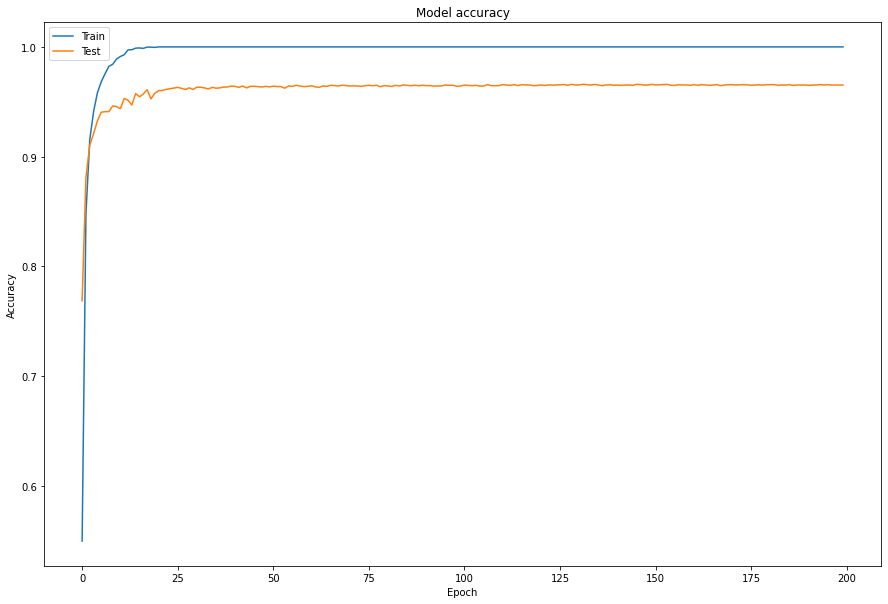

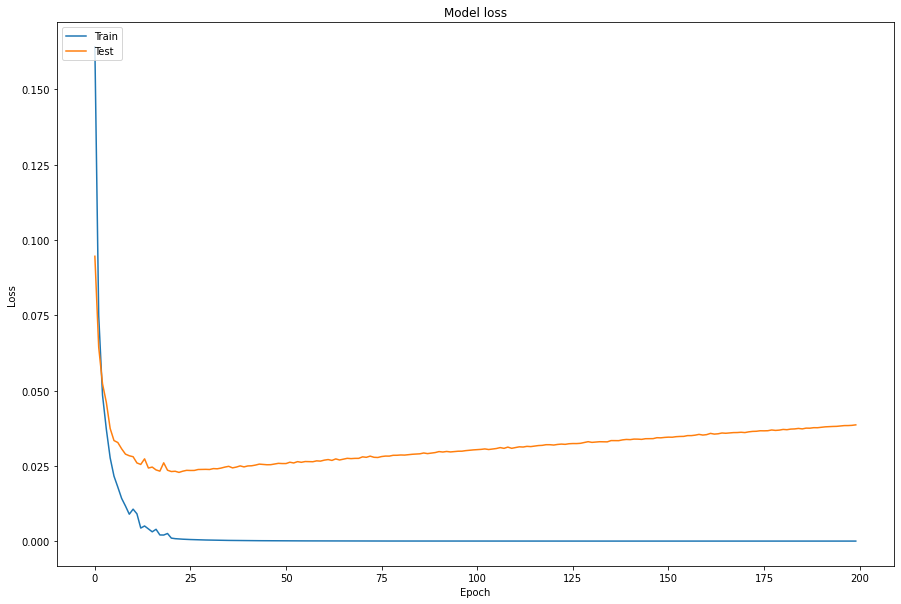

In [ ]:
display_f1_m()
display_loss()

In [ ]:
f1_1 = results.history['val_f1_m'][-1]

K ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
neigh = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm = 'auto')
neigh.fit(X_train,Y_train)
f1_2 = f1_m(Y_test, K.round(neigh.predict_proba(X_test)[:,1]))

Деревья решений

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3)
tree.fit(X_train,Y_train)
f1_3 = f1_m(Y_test, K.round(tree.predict_proba(X_test)[:,1]))

Итоговая оценка

In [ ]:
print('Нейронная сеть: ', f1_1)
print('Деревья решений: ', f1_3)
print('Gradient Boosted trees: ', f1_4)
print("Средняя f1 мера составляет", (f1_1+f1_4+f1_3)/3)
print("Количество баллов равно", max(min(22,(f1_1+f1_4+f1_3)*100/3-75),0))

Нейронная сеть:  0.9653072357177734
Деревья решений:  tf.Tensor(0.8628960115468031, shape=(), dtype=float64)
Gradient Boosted trees:  tf.Tensor(0.9258566479557289, shape=(), dtype=float64)
Средняя f1 мера составляет tf.Tensor(0.9180199650734351, shape=(), dtype=float64)
Количество баллов равно tf.Tensor(16.801996507343517, shape=(), dtype=float64)


Для достижения результата можно попробовать Gradient Boosted trees, Random Forest, Naive Bayes и другие варианты классификаторов и выбрать 3 наилучших варианта.

Gradient Boosted trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators = 100, learning_rate= 0.1, max_depth=7, random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
rf_score = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1')
print(rf_score)
f1_4 = f1_m(Y_test, predictions)
print(f1_4)
print(classification_report(Y_test, predictions, zero_division = 0))

[0.88577535 0.87362374 0.89219858]
tf.Tensor(0.9258566479557289, shape=(), dtype=float64)
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     18295
         1.0       0.99      0.87      0.93      1705

    accuracy                           0.99     20000
   macro avg       0.99      0.94      0.96     20000
weighted avg       0.99      0.99      0.99     20000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clf_score = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (clf_score.mean(), clf_score.std()))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 1)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)
rf_score = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1')
print(rf_score)
f1_5 = f1_m(Y_test, predictions)
print(f1_5)
print(classification_report(Y_test, predictions, zero_division=0))

[0.70200893 0.70565302 0.69494382]
tf.Tensor(0.7935050702672841, shape=(), dtype=float64)
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18295
         1.0       1.00      0.66      0.79      1705

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
#Вариант поиска лучших параметров, но на наших данных это работает очень долго
from sklearn.model_selection import RandomizedSearchCV
rfc_2 = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, Y_train)
print(rs.best_params_)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, Y_train)
predictions = model.predict(X_test)
rf_score = cross_val_score(model, X_train, Y_train, cv=3, scoring='f1')
print(rf_score)
f1_6 = f1_m(Y_test, predictions)
print(f1_6)
print(classification_report(Y_test, predictions, zero_division=0))

ValueError: ignored